# Notebook for viewing postISRCCD images.

Initially written 28 Sep 2020 by Craig Lage

In [1]:
! eups list -s | grep lsst_distrib
! eups list -s cp_pipe

lsst_distrib          20.0.0-1-g0037e03+e1f41a530d 	current w_2020_33 setup
   20.0.0-7-g3c4151b+eb42c07937 	current w_2020_33 setup


In [2]:
import sys, os, glob, subprocess
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as pf
from lsst.daf.persistence import Butler

In [90]:
RAFT = 'R12'
SENSOR = 'S02'
data = {}
flux = "Hi"
#flux = "Low"

In [91]:
# First, data from the 9 raft run
REPO_DIR = '/project/shared/BOT/rerun/cslage/PTC_6790D_NewAll_Amp/'
RUN = '6790D'
if flux == "Low":
    expId_1 = 3019101200332
    expId_2 = 3019101200333
elif flux == "Hi":
    expId_1 = 3019101200414
    expId_2 = 3019101200415
butler = Butler(REPO_DIR)
postISRCCD_1 = butler.get('postISRCCD',  raftName=RAFT,run=RUN, detectorName=SENSOR, expId=expId_1)
postISRCCD_2 = butler.get('postISRCCD',  raftName=RAFT,run=RUN, detectorName=SENSOR, expId=expId_2)
raw_1 = butler.get('raw',  raftName=RAFT,run=RUN, detectorName=SENSOR, expId=expId_1)
raw_2 = butler.get('raw',  raftName=RAFT,run=RUN, detectorName=SENSOR, expId=expId_2)
bias_1 = butler.get('bias',  raftName=RAFT,run=RUN, detectorName=SENSOR, expId=expId_1)
bias_2 = butler.get('bias',  raftName=RAFT,run=RUN, detectorName=SENSOR, expId=expId_2)
data[RUN] = [expId_1, expId_2, bias_1, bias_2, raw_1, raw_2, postISRCCD_1, postISRCCD_2]

In [93]:
# Next, data from the 13 raft run
REPO_DIR = '/project/shared/BOT/rerun/cslage/PTC_LSSTCAM_12543/'
RUN = '12543'
if flux == "Low":
    expId_1 = 3020090200352
    expId_2 = 3020090200353
elif flux == "Hi":
    expId_1 = 3020090200370
    expId_2 = 3020090200371
butler = Butler(REPO_DIR)
postISRCCD_1 = butler.get('postISRCCD',  raftName=RAFT,run=RUN, detectorName=SENSOR, expId=expId_1)
postISRCCD_2 = butler.get('postISRCCD',  raftName=RAFT,run=RUN, detectorName=SENSOR, expId=expId_2)
raw_1 = butler.get('raw',  raftName=RAFT,run=RUN, detectorName=SENSOR, expId=expId_1)
raw_2 = butler.get('raw',  raftName=RAFT,run=RUN, detectorName=SENSOR, expId=expId_2)
bias_1 = butler.get('bias',  raftName=RAFT,run=RUN, detectorName=SENSOR, expId=expId_1)
bias_2 = butler.get('bias',  raftName=RAFT,run=RUN, detectorName=SENSOR, expId=expId_2)
data[RUN] = [expId_1, expId_2, bias_1, bias_2, raw_1, raw_2, postISRCCD_1, postISRCCD_2]

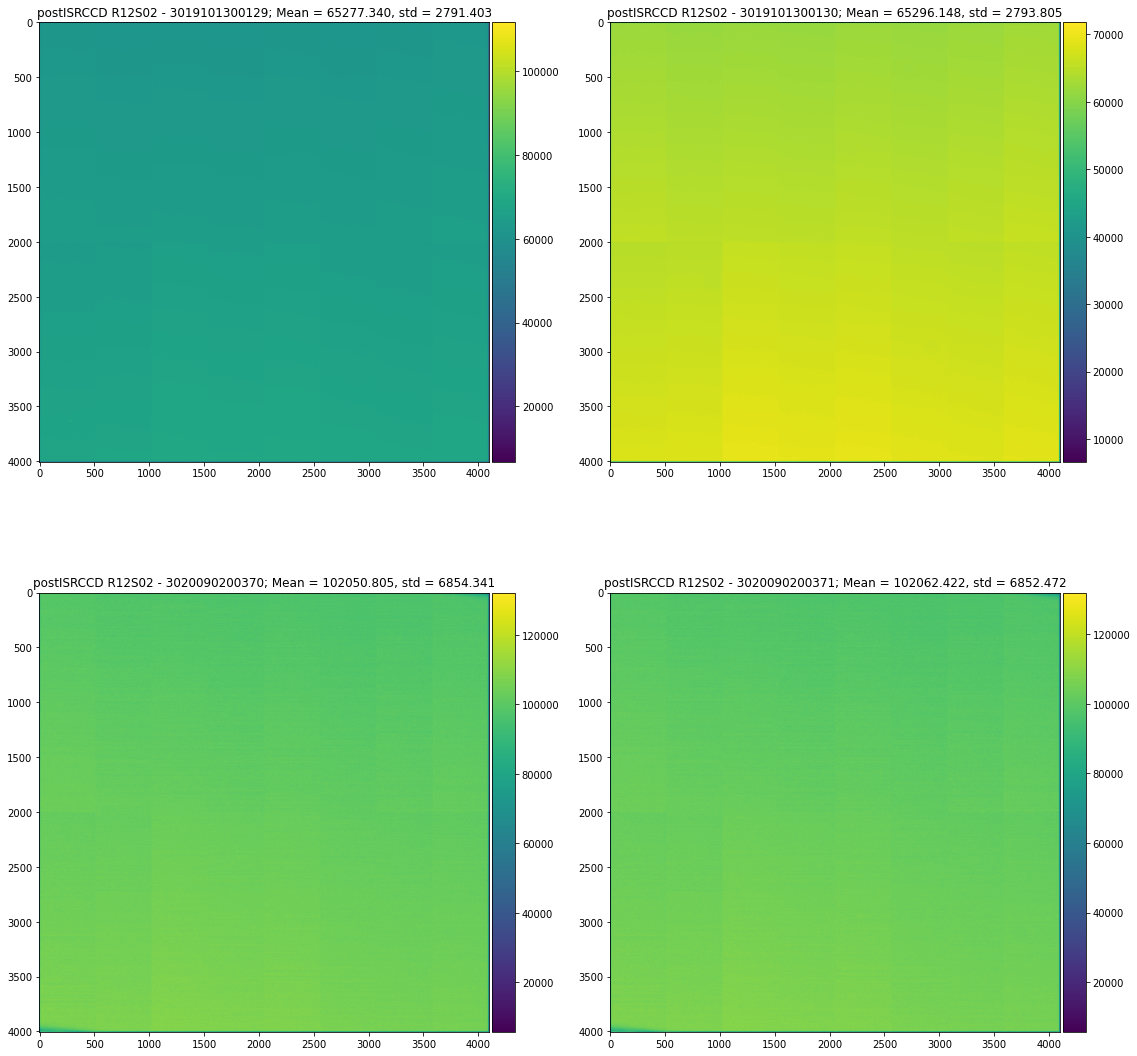

In [26]:
# Now let's look at ithem
def colorbar(mappable):
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    last_axes = plt.gca()
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = fig.colorbar(mappable, cax=cax)
    plt.sca(last_axes)
    return cbar

fig = plt.figure(figsize=(16,16))
[expId_1, expId_2, postISRCCD_1, postISRCCD_2] = data['6790D']
arr1 = postISRCCD_1.image.array
image1_mean = np.mean(arr1)
image1_std = np.std(arr1)
ax1 = plt.subplot(2,2,1)
img1 = ax1.imshow(arr1)
colorbar(img1)
ax1.set_title("postISRCCD %s%s - %d; Mean = %.3f, std = %.3f"%(RAFT,SENSOR,expId_1,image1_mean,image1_std))

arr2 = postISRCCD_2.image.array
image2_mean = np.mean(arr2)
image2_std = np.std(arr2)
ax2 = plt.subplot(2,2,2)
img2 = ax2.imshow(arr2)#, vmin=0, vmax=40)
ax2.set_title("postISRCCD %s%s - %d; Mean = %.3f, std = %.3f"%(RAFT,SENSOR,expId_2,image2_mean,image2_std))
colorbar(img2)
[expId_1, expId_2, postISRCCD_1, postISRCCD_2] = data['12543']
arr1 = postISRCCD_1.image.array
image1_mean = np.mean(arr1)
image1_std = np.std(arr1)
ax3 = plt.subplot(2,2,3)
img1 = ax3.imshow(arr1)
colorbar(img1)
ax3.set_title("postISRCCD %s%s - %d; Mean = %.3f, std = %.3f"%(RAFT,SENSOR,expId_1,image1_mean,image1_std))

arr2 = postISRCCD_2.image.array
image2_mean = np.mean(arr2)
image2_std = np.std(arr2)
ax4 = plt.subplot(2,2,4)
img2 = ax4.imshow(arr2)#, vmin=0, vmax=40)
ax4.set_title("postISRCCD %s%s - %d; Mean = %.3f, std = %.3f"%(RAFT,SENSOR,expId_2,image2_mean,image2_std))
colorbar(img2)

plt.tight_layout(h_pad=1)
plt.savefig(REPO_DIR+"plots/PostISRCCD__HiFLux_08Sep20.pdf")


/opt/lsst/software/stack/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/ipykernel/__main__.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/lsst/software/stack/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/ipykernel/__main__.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


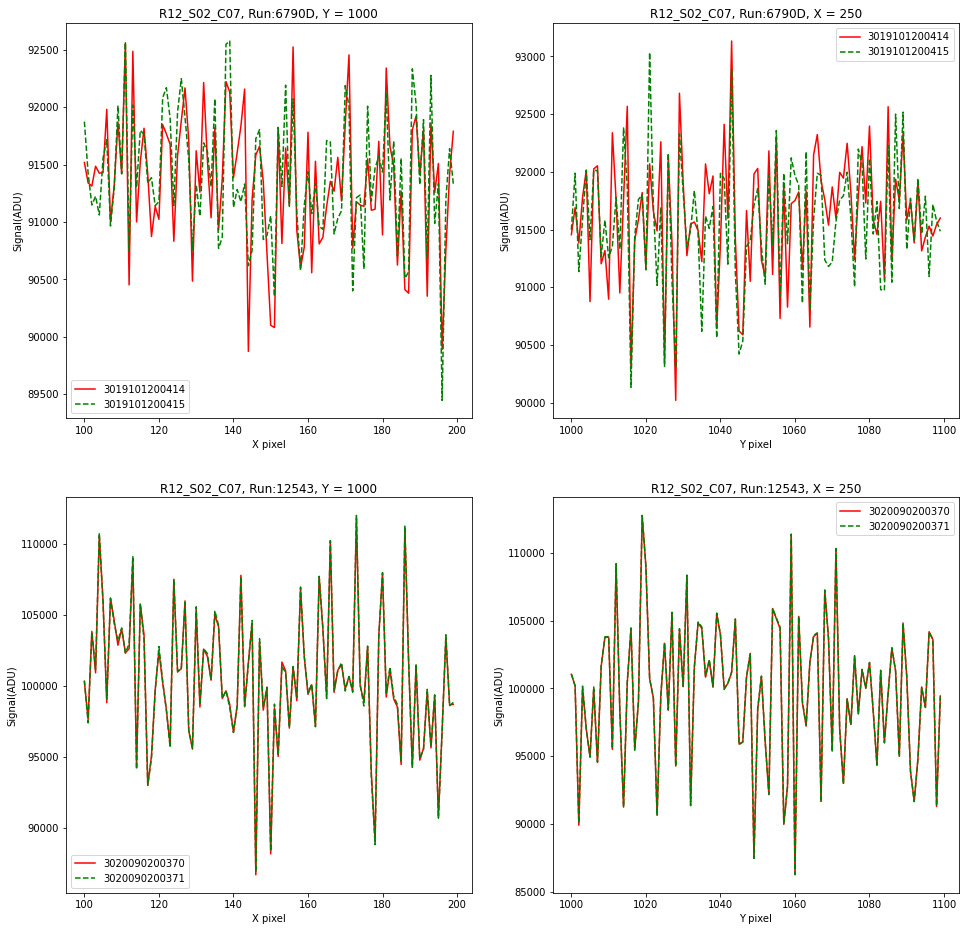

In [94]:
y = 1000
xmin = 100
xmax = 200
x = 250
ymin = 1000
ymax = 1100
xaxis = np.arange(xmin,xmax)
yaxis = np.arange(ymin,ymax)
fig = plt.figure(figsize = (16,16))
plotCounter = 1
myAmp = 'C07'
for run in ['6790D', '12543']:
    [expId_1, expId_2, bias_1, bias_2, raw_1, raw_2, postISRCCD_1, postISRCCD_2] = data[run]
    plt.subplot(2,2,plotCounter)
    ccd = postISRCCD_1.getDetector()
    for amp in ccd:
        ampName = amp.getName()
        if ampName not in [myAmp]:
            continue
        img1 = postISRCCD_1.image
        arr1 = img1.Factory(img1, amp.getBBox()).array
        img2 = postISRCCD_2.image
        arr2 = img2.Factory(img2, amp.getBBox()).array
        plt.subplot(2,2,plotCounter)
        plt.title("%s_%s_%s, Run:%s, Y = %d"%(RAFT,SENSOR,ampName,run,y))
        plt.plot(xaxis, arr1[y,xmin:xmax], color = 'red', label = str(expId_1))
        plt.plot(xaxis, arr2[y,xmin:xmax], color = 'green', ls = '--', label = str(expId_2))
        plt.xlabel("X pixel")
        plt.ylabel("Signal(ADU)")
        plt.legend()

        plt.subplot(2,2,plotCounter+1)
        plt.title("%s_%s_%s, Run:%s, X = %d"%(RAFT,SENSOR,ampName,run,x))
        plt.plot(yaxis, arr1[ymin:ymax,x], color = 'red', label = str(expId_1))
        plt.plot(yaxis, arr2[ymin:ymax,x], color = 'green', ls = '--', label = str(expId_2))
        plt.xlabel("Y pixel")
        plt.ylabel("Signal(ADU)")
        plt.legend()

    plotCounter += 2
#plt.savefig(REPO_DIR+"plots/Correlations_%s_%s_%s_HiFlux_08Sep20.pdf"%(RAFT,SENSOR,myAmp))
#plt.savefig(REPO_DIR+"plots/Correlations_%s_%s_%s_LoFlux_08Sep20.pdf"%(RAFT,SENSOR,myAmp))

(4096, 4608) (2002, 512)
6790D 25777.783 799.2009 23786.398 28623.422
(4096, 4608) (2002, 512)
12543 26218.69 4672.144 15590.273 40901.133


/opt/lsst/software/stack/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/ipykernel/__main__.py:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/lsst/software/stack/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/ipykernel/__main__.py:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


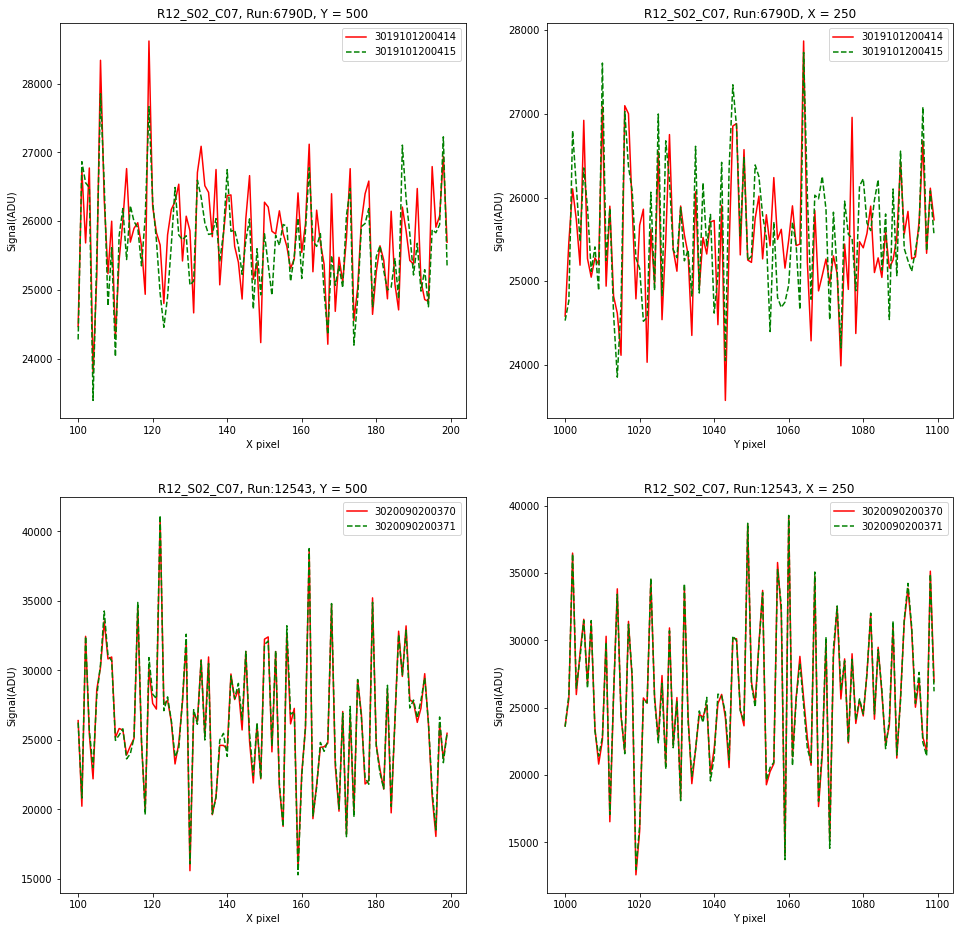

In [120]:
y = 500
xmin = 100
xmax = 200
x = 250
ymin = 1000
ymax = 1100
xaxis = np.arange(xmin,xmax)
yaxis = np.arange(ymin,ymax)
fig = plt.figure(figsize = (16,16))
plotCounter = 1
myAmp = 'C07'
for run in ['6790D', '12543']:
    [expId_1, expId_2, bias_1, bias_2, raw_1, raw_2, postISRCCD_1, postISRCCD_2] = data[run]
    plt.subplot(2,2,plotCounter)
    ccd = postISRCCD_1.getDetector()
    for amp in ccd:
        ampName = amp.getName()
        if ampName not in [myAmp]:
            continue
        img1 = postISRCCD_1.image
        arr1 = -img1.Factory(img1, amp.getBBox()).array
        img2 = postISRCCD_2.image
        arr2 = -img2.Factory(img2, amp.getBBox()).array
        img3 = raw_1.image
        arr1 += img3.Factory(img3, amp.getBBox()).array
        img4 = raw_2.image
        print(img4.array.shape, img4.Factory(img4, amp.getBBox()).array.shape)
        arr2 += img4.Factory(img4, amp.getBBox()).array
        plt.subplot(2,2,plotCounter)
        plt.title("%s_%s_%s, Run:%s, Y = %d"%(RAFT,SENSOR,ampName,run,y))
        plt.plot(xaxis, arr1[y,xmin:xmax], color = 'red', label = str(expId_1))
        plt.plot(xaxis, arr2[y,xmin:xmax], color = 'green', ls = '--', label = str(expId_2))
        plt.xlabel("X pixel")
        plt.ylabel("Signal(ADU)")
        plt.legend()
        arrx = arr1[y,xmin:xmax]
        print(run, arrx.mean(), arrx.std(), arrx.min(), arrx.max())
        plt.subplot(2,2,plotCounter+1)
        plt.title("%s_%s_%s, Run:%s, X = %d"%(RAFT,SENSOR,ampName,run,x))
        plt.plot(yaxis, arr1[ymin:ymax,x], color = 'red', label = str(expId_1))
        plt.plot(yaxis, arr2[ymin:ymax,x], color = 'green', ls = '--', label = str(expId_2))
        plt.xlabel("Y pixel")
        plt.ylabel("Signal(ADU)")
        plt.legend()

    plotCounter += 2
#plt.savefig(REPO_DIR+"plots/Correlations_%s_%s_%s_HiFlux_08Sep20.pdf"%(RAFT,SENSOR,myAmp))
#plt.savefig(REPO_DIR+"plots/Correlations_%s_%s_%s_LoFlux_08Sep20.pdf"%(RAFT,SENSOR,myAmp))

/opt/lsst/software/stack/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/ipykernel/__main__.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/lsst/software/stack/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/ipykernel/__main__.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


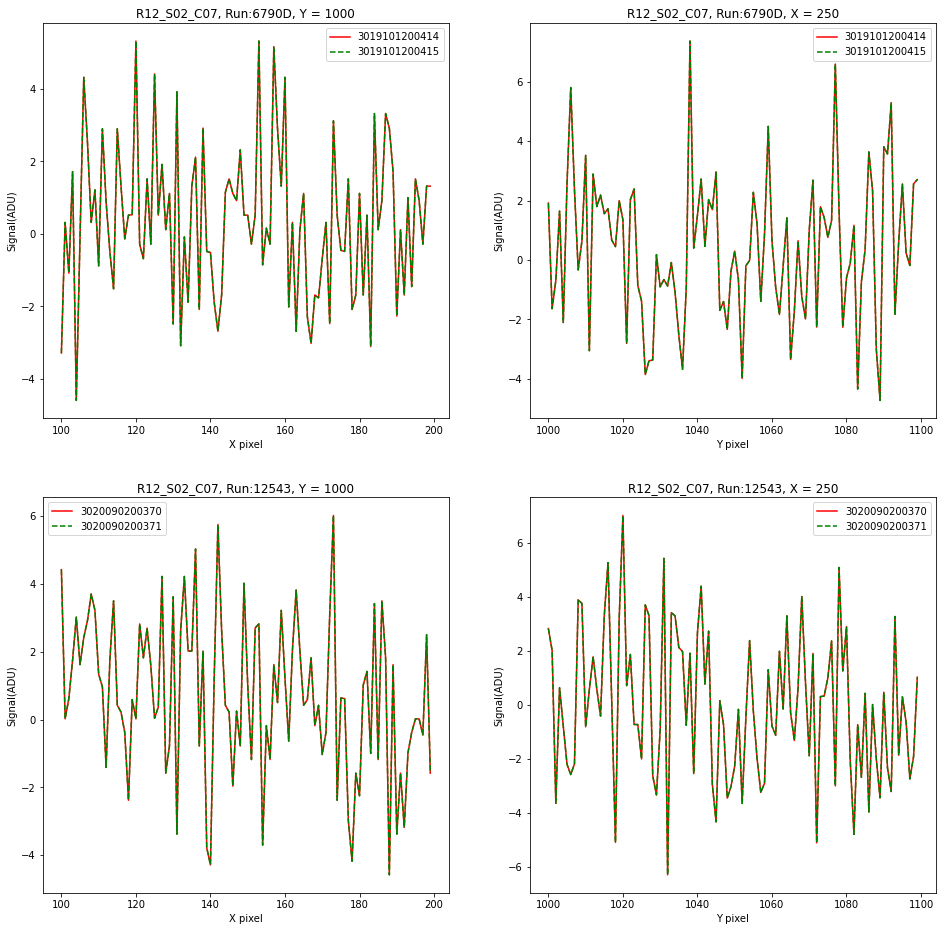

In [96]:
y = 1000
xmin = 100
xmax = 200
x = 250
ymin = 1000
ymax = 1100
xaxis = np.arange(xmin,xmax)
yaxis = np.arange(ymin,ymax)
fig = plt.figure(figsize = (16,16))
plotCounter = 1
myAmp = 'C07'
for run in ['6790D', '12543']:
    [expId_1, expId_2, bias_1, bias_2, raw_1, raw_2, postISRCCD_1, postISRCCD_2] = data[run]
    plt.subplot(2,2,plotCounter)
    ccd = postISRCCD_1.getDetector()
    for amp in ccd:
        ampName = amp.getName()
        if ampName not in [myAmp]:
            continue
        img1 = bias_1.image
        arr1 = img1.Factory(img1, amp.getBBox()).array
        img2 = bias_2.image
        arr2 = img2.Factory(img2, amp.getBBox()).array
        plt.subplot(2,2,plotCounter)
        plt.title("%s_%s_%s, Run:%s, Y = %d"%(RAFT,SENSOR,ampName,run,y))
        plt.plot(xaxis, arr1[y,xmin:xmax], color = 'red', label = str(expId_1))
        plt.plot(xaxis, arr2[y,xmin:xmax], color = 'green', ls = '--', label = str(expId_2))
        plt.xlabel("X pixel")
        plt.ylabel("Signal(ADU)")
        plt.legend()

        plt.subplot(2,2,plotCounter+1)
        plt.title("%s_%s_%s, Run:%s, X = %d"%(RAFT,SENSOR,ampName,run,x))
        plt.plot(yaxis, arr1[ymin:ymax,x], color = 'red', label = str(expId_1))
        plt.plot(yaxis, arr2[ymin:ymax,x], color = 'green', ls = '--', label = str(expId_2))
        plt.xlabel("Y pixel")
        plt.ylabel("Signal(ADU)")
        plt.legend()

    plotCounter += 2
#plt.savefig(REPO_DIR+"plots/Correlations_%s_%s_%s_HiFlux_08Sep20.pdf"%(RAFT,SENSOR,myAmp))
#plt.savefig(REPO_DIR+"plots/Correlations_%s_%s_%s_LoFlux_08Sep20.pdf"%(RAFT,SENSOR,myAmp))

26574.146 4.7201114
(4096, 4608)


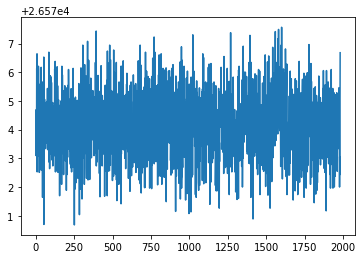

In [125]:


oscan1 = raw_1.image.array[10:1992,523:576]
print(oscan1.mean(), oscan1.std())

plt.plot(np.mean(raw_1.image.array[10:1992,523:576],axis=1))
#plt.plot(raw_1.image.array[1000,4530:4560])
print(raw_1.image.array.shape)

/opt/lsst/software/stack/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/ipykernel/__main__.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/lsst/software/stack/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/ipykernel/__main__.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


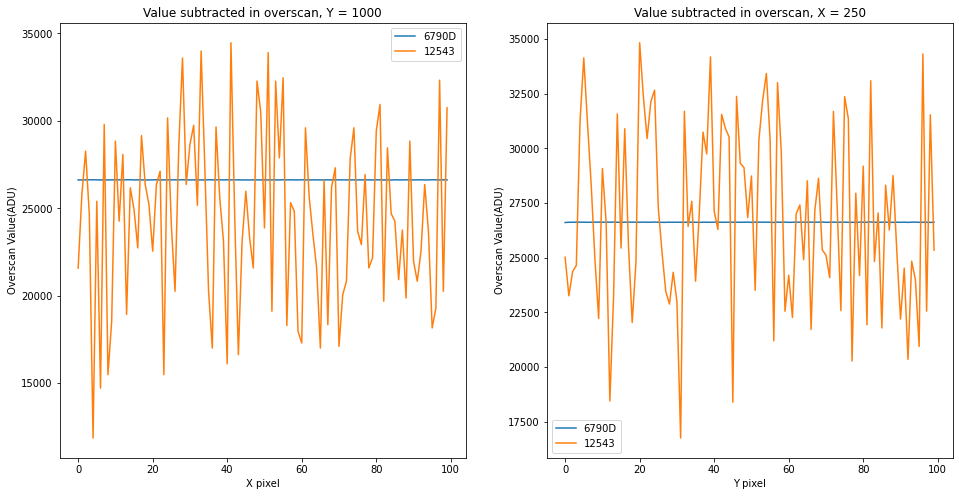

In [158]:
y = 1000
xmin = 100
xmax = 200
x = 250
ymin = 1000
ymax = 1100

prescan_cols = 0
prescan_rows = 10
overscan_rows = 54

fig = plt.figure(figsize = (16,8))
run = '6790D'
run = '6790D'
for run in ['6790D', '12543']:
    [expId_1, expId_2, bias_1, bias_2, raw_1, raw_2, postISRCCD_1, postISRCCD_2] = data[run]
    plt.subplot(1,2,1)
    plt.title("Value subtracted in overscan, Y = %d"%(y))
    overscan = raw_1.image.array[y+prescan_cols, (xmin+prescan_rows):(xmax+prescan_rows)] - \
            postISRCCD_1.image.array[y, xmin:xmax]
    plt.plot(overscan, label=run)
    plt.xlabel("X pixel")
    plt.ylabel("Overscan Value(ADU)")
    plt.legend()

    plt.subplot(1,2,2)
    plt.title("Value subtracted in overscan, X = %d"%(x))
    overscan = raw_1.image.array[(ymin+prescan_cols):(ymax+prescan_cols), x+prescan_rows] - \
            postISRCCD_1.image.array[ymin:ymax, x]
    plt.plot(overscan,label=run)
    plt.xlabel("Y pixel")
    plt.ylabel("Overscan Value(ADU)")
    plt.legend()
plt.savefig(REPO_DIR+"plots/Overscan_Subtraction_%s_%s_%s_HiFlux_08Sep20.pdf"%(RAFT,SENSOR,myAmp))

In [145]:
print(raw_1.image.array.shape, postISRCCD_1.image.array.shape)

(4096, 4608) (4004, 4096)
